In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import warnings

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\9.random.csv",header=None)

In [3]:
data

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0
...,...,...,...
395,0.324,0.431,1.0
396,0.602,0.588,0.0
397,0.616,0.503,1.0
398,0.742,0.511,1.0


In [4]:
data[2].value_counts()

1.0    202
0.0    198
Name: 2, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

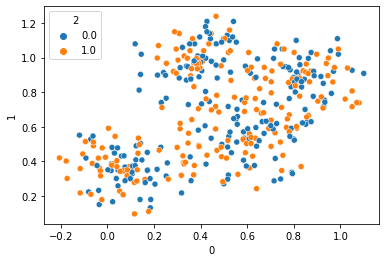

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.2)

In [15]:
std=StandardScaler()

In [16]:
sc=std.fit_transform(x_train)

In [19]:
model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2))
model.add(Dense(4,activation="sigmoid"))
model.add(Dense(4,activation="sigmoid"))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [22]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 4) vs (None, 1)).
